# Ανίχνευση της Θερμογένεσης του Φαιού Λιπώδους Ιστού 
## Στην περιοχή γύρω από τον αυχένα
1. Αρχικά δείχνουμε την επεξεργασία μίας εικόνας που οδηγεί στην αφαίρεση του background
2. Αυτό οδηγεί σε μία binary μάσκα
3. Στη συνέχεια κατασκευάζουμε μια εικόνα με τα csv δεδομένα

## Εικόνες για τη γενική ανατομία του λιπώδους ιστού
### Εξέλιξη της φαιoποίησης του λευκού λιπώδους ιστού σε διαφορετικά ποντίκια υπό κρύο περιβάλλον
Στην εικόνα οι υποδόριες και σπλαχνικές αποθήκες τεμαχίστηκαν και τοποθετήθηκαν σε ένα πρότυπο ποντικιού ώστε να φανεί η σχετική τοποθεσία τους στο σώμα. 
Το ποντίκι στα αριστερά διατηρήθηκε σε θερμοκρασίες κοντά στη θερμο-ουδετερότητα (28℃ για 10 ημέρες), ενώ το ποντίκι στα δεξιά προσαρμόστηκε σε κρύο περιβάλλον (6℃ για 10 ημέρες). Η φαιοποίηση του λιπώδους οργάνου είναι εμφανής στον θερμικά προσαρμοσμένο ποντίκι. 
* Το λιπώδες όργανο αποτελείται από δυο υποδόριες αποθήκες: 
    - (Α) πρόσθια (βαθιά αυχενική, επιφανειακή αυχενική, ενδοκεφαλική, υποκεφαλική, αξιλο-θωρακική) 
    - (F) οπίσθια (ραχιαίος-οσφυϊκός, βουβωνικός, γλουτιαίος), 
    - και από αρκετές σπλαχνικές αποθήκες: 
        - (Β) μεσοθωρακικό, 
        - (C) μεσεντερικό, 
        - (D) ρετρό-περιτοναϊκό και
        - (Ε) κοιλιακό-πυελικό (περινεναλικός, περιατοβαρικός, παραμετρικός, περικοκικός).

Ράβδος κλίμακας: 1 cm. Το λιπώδες όργανο των ποντικών Sv129 περιέχει τον επιπολασμό των καφέ λιποκυττάρων και δείχνει την πλαστικότητα μετά από κρύα έκθεση. 
![ανατομική εικόνα](img/giorgano.png)

## Περιοχές ενδιαφέροντος 
### Στο notebook ερευνάται η περίπτωση του BAT

| WAT Location            | BAT Location |
| ------------------------- | ------------------------- |
| ![something](img/wat_location.jpg)  | ![something](img/bat_location.jpg) |

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from celluloid import Camera
from IPython.display import HTML # to show the animation in Jupyter
from tqdm import tqdm
from glob import glob

from skimage.exposure import histogram
from skimage.util import img_as_ubyte

from src.features import mouse_detection
from src.data import data_utils

src.data.data_utils


- Παράδειγμα:
    - χρήση όλων των θερμικών εικόνων στο directory `/data/raw/0h/mouse_1`
    - χρήση των csv των εικόνων 
    - εξαγωγή των μασκών των αντικειμένων, και τα bounding box 
    - ορθογώνιο patch με βάση το bounding box

### Demonstration για μια εικόνα 

<AxesSubplot:title={'center':'CSV values'}>

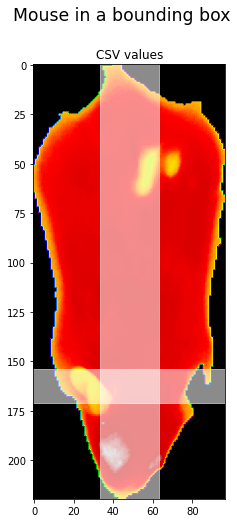

In [3]:
infrared_images = [] # stores (238, 98) arrays etc
exif_datum = []
items = glob(module_path + '/data/raw/0h/mouse_1/IR_*')
for item in items:
    infrared_image, exif_data = data_utils.IR_fixer(fpath=item, fname='')
    infrared_images.append(infrared_image)
    exif_datum.append(exif_data)
markerBack, markerBody = 70, 120

object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)

csv_files = [] # stores (240, 160) arrays
items = glob(module_path + '/data/raw/0h/mouse_1/CSV_*')
for item in items:
    csv_files.append(data_utils.CSV_fixer(item, fname='', save_dir=''))

thermals = [csv * mask  for (mask, csv) in zip(initial_masks, csv_files)]

example = [thermal[location] for thermal, location in zip(thermals, mouse_locations)]

fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Mouse in a bounding box', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])

ax0.imshow(X=example[0], cmap=plt.cm.nipy_spectral)
#ax0.axvline(x=new[0].shape[1]/2, c='black')
#ax0.axvline(x=new[0].shape[1]/2, c='red')
xmin = int(0.35*example[0].shape[1])
xmax = int(0.65*example[0].shape[1])
ymin = int(0.70*example[0].shape[0])
ymax = int(0.78*example[0].shape[0])
ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
#ax0.axhline(y=new[0].shape[0]/2 + infrared_images[0].shape[0], c='yellow')
#ax0.axhline(y=optical_images[0].shape[0]/2 - infrared_images[0].shape[0], c='green')
ax0.set_title(label='CSV values')
fig.add_subplot(ax0)

### Demonstation για όλο το directory `/data/raw/0h/mouse_1`

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 37.77it/s]


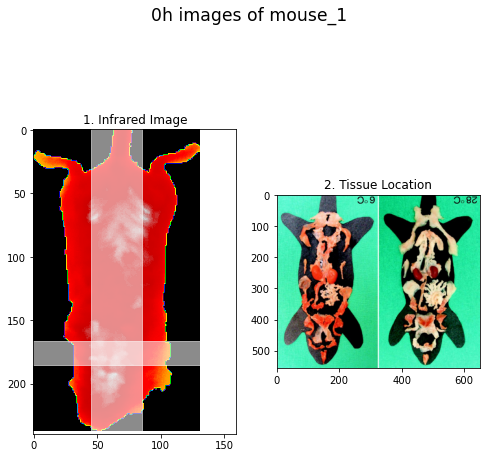

In [4]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='0h images of mouse_1', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])
ax0.set_title(label='1. Infrared Image')
ax1.set_title(label='2. Tissue Location')
camera = Camera(fig)
for image in tqdm(example):
    ax1.imshow(X=imread('img/tissues.png'))
    ax0.imshow(X=image, cmap=plt.cm.nipy_spectral)
    xmin = int(0.35*image.shape[1])
    xmax = int(0.65*image.shape[1])
    ymin = int(0.70*image.shape[0])
    ymax = int(0.78*image.shape[0])
    ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)
    fig.add_subplot(ax0)
    camera.snap()
animation = camera.animate(interval=500)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

# Ανιχνεύεται η συμπεριφορά του φαιού λιπώδους ιστού;
## Η καταγραφή για εννέα ορθογώνια δείγματα στα πέντε ποντίκια του πειράματος
### Επιλογή εικόνων για τη μέτρηση της μέσης θερμοκρασίας και της τυπικής απόκλισης
Στο αρχείο bat_list.yml έχουμε ορίσει από ποιες εικόνες θα καταγράψουμε τη μέση θερμοκρασία ενός τετραγωνικού patch το οποίο βρίσκεται στον αυχένα ενός ποντικιού, όπως φαίνεται στην παραπάνω εικόνα. 

Δομή του αρχείου yaml: 
```
samples: [0h, 24h, 48h, 72h, 96h, 120h, 144h, 192h, 240h]
mouse_1:
  csv: [CSV_2060.csv, CSV_2305.csv, CSV_2509.csv, CSV_2730.csv, CSV_2957.csv, CSV_3181.csv, CSV_3397.csv, CSV_3652.csv, CSV_3855.csv]
  jpeg: [IR_2060.jpg, IR_2305.jpg, IR_2509.jpg, IR_2730.jpg, IR_2957.jpg, IR_3181.jpg, IR_3397.jpg, IR_3652.jpg, IR_3855.jpg]
.
.
. κλπ
```

In [5]:
# Εισαγωγή του αρχείου yaml
import yaml
from src.features import img_to_vectors
with open(module_path + '/data/bat_list.yml') as file:
    experiment = yaml.load(file, Loader=yaml.FullLoader)
# experiment['samples'], experiment['mouse_id']

In [ ]:
# Πρόσβαση στα δεδομένα του αρχείου
mouse_names = ['mouse_1', 'mouse_2', 'mouse_3', 'mouse_4', 'mouse_5']
# mouse_names = ['mouse_1']
# Κατασκευή των global path για τα αρχεία του πειράματος
infrared_items = []
csv_items = []
for mouse_name in mouse_names:
    for hour, jpeg_file in zip(experiment['samples'], experiment[mouse_name]['jpeg']):
        full_jpeg_path = module_path + '/data/raw/' + hour + '/' + mouse_name + '/' + jpeg_file
        infrared_items.append(full_jpeg_path)

    for hour, csv_file in zip(experiment['samples'], experiment[mouse_name]['csv']):
        full_csv_path = module_path + '/data/raw/' + hour + '/' + mouse_name + '/' + csv_file
        csv_items.append(full_csv_path)
# Εισαγωγή των δεδομένων με βάση τα path και οι προεπεξεργασίες τους
infrared_images = [] # will store (238, 98), (229, 100) arrays etc
exif_datum = []
for item in infrared_items:
    infrared_image, exif_data = initial_data_pick.IR_fixer(fpath=item, fname='')
    infrared_images.append(infrared_image)
    exif_datum.append(exif_data)

markerBack, markerBody = 70, 120

object_images, object_masks, initial_masks, mouse_locations = mouse_detection.mouse_detection(infrared_images, markerBack, markerBody)

csv_files = [] # will store (240, 160) arrays
for item in csv_items:
    csv_files.append(data_utils.CSV_fixer(item, fname='', save_dir=''))

thermals = [mask * csv for (mask, csv) in zip(initial_masks, csv_files)]
new = [thermal[location] for thermal, location in zip(thermals, mouse_locations)]

fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t=f'Experiment course for {mouse_names}', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])

mean_roi_temp = []
roi_area_area = []
std_roi = []
camera = Camera(fig)
print(f'{mouse_names}')
for i, (image) in tqdm(enumerate(new)):
    ordinatesX, ordinatesY = img_to_vectors.img_to_vectors(image)
    intensityFeature = image[ordinatesX, ordinatesY]
    xmin = int(0.35*image.shape[1])
    xmax = int(0.65*image.shape[1])
    ymin = int(0.70*image.shape[0])
    ymax = int(0.78*image.shape[0])
    roi_area = image[ymin:ymax, xmin:xmax]
    std_roi.append(np.std(roi_area))
    mean_roi_temp.append(np.mean(roi_area))
    roi_area_area.append(roi_area.size)
    # print(f'sample: #{i}')
    print(f'Body : shape: {image.shape}, area: {intensityFeature.size} Mean Temp: {np.mean(intensityFeature)}  Std Temp: {np.std(intensityFeature)}')
    print(f'Patch : shape: {roi_area.shape}, area: {roi_area.size} Mean Temp: {np.mean(roi_area)}  Std Temp: {np.std(roi_area)}')
    ax0.imshow(X=image, cmap=plt.cm.nipy_spectral)
    # ax0.set_title(label=sample)
    ax0.axvspan(xmin=xmin, xmax=xmax, color='white', alpha=0.55)
    ax0.axhspan(ymin=ymin, ymax=ymax, color='white', alpha=0.55)    
    fig.add_subplot(ax0)
    camera.snap()
animation = camera.animate(interval=100)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

In [ ]:
roi_temp = pd.DataFrame(np.reshape(mean_roi_temp, (9, 5)), columns=experiment['mouse_id'], index=experiment['samples'])
roi_area = pd.DataFrame(np.reshape(roi_area_area, (9, 5)), columns=experiment['mouse_id'], index=experiment['samples'])
roi_std = pd.DataFrame(np.reshape(std_roi, (9, 5)), columns=experiment['mouse_id'], index=experiment['samples'])

### Ποιες περιπτώσεις εμφανίζουν μεγάλο σφάλμα;

In [ ]:
std_temp[std_temp > 1.0]

In [ ]:
roi_temp = pd.DataFrame()
roi_std = pd.DataFrame()
roi_area = pd.DataFrame()

In [ ]:
# mouse_1 datapoints
mean_roi_temp1 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area1 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi1 = pd.Series(std_roi, index=experiment['samples'])

In [ ]:
# mouse_2 datapoints
mean_roi_temp2 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area2 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi2 = pd.Series(std_roi, index=experiment['samples'])

In [ ]:
# mouse_3 datapoints
mean_roi_temp3 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area3 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi3 =  pd.Series(std_roi, index=experiment['samples'])

In [ ]:
# mouse_4 datapoints
mean_roi_temp4 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area4 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi4 =  pd.Series(std_roi, index=experiment['samples'])

In [ ]:
# mouse_5 datapoints
mean_roi_temp5 = pd.Series(mean_roi_temp, index=experiment['samples'])
roi_area_area5 = pd.Series(roi_area_area, index=experiment['samples'])
std_roi5 =  pd.Series(std_roi, index=experiment['samples'])

In [ ]:
roi_temp['mouse_1'] = mean_roi_temp1
roi_temp['mouse_2'] = mean_roi_temp2
roi_temp['mouse_3'] = mean_roi_temp3
roi_temp['mouse_4'] = mean_roi_temp4
roi_temp['mouse_5'] = mean_roi_temp5

roi_std['mouse_1'] = std_roi1
roi_std['mouse_2'] = std_roi2
roi_std['mouse_3'] = std_roi3
roi_std['mouse_4'] = std_roi4
roi_std['mouse_5'] = std_roi5

roi_area['mouse_1'] = roi_area_area1
roi_area['mouse_2'] = roi_area_area2
roi_area['mouse_3'] = roi_area_area3
roi_area['mouse_4'] = roi_area_area4
roi_area['mouse_5'] = roi_area_area5

In [ ]:
pos_x = np.arange(len(experiment['samples']))

fig = plt.figure(figsize=(20, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
ax.plot(pos_x, roi_temp['mouse_1'].values, 'k', label='mouse_1 (℃)')
ax.plot(pos_x, roi_temp['mouse_2'].values, 'r', label='mouse_2 (℃)')
ax.plot(pos_x, roi_temp['mouse_3'].values, 'b', label='mouse_3 (℃)')
ax.plot(pos_x, roi_temp['mouse_4'].values, 'y', label='mouse_4 (℃)')
ax.plot(pos_x, roi_temp['mouse_5'].values, 'c', label='mouse_5 (℃)')
ax.scatter(pos_x, roi_temp['mouse_1'].values, c='black', s=10)
ax.scatter(pos_x, roi_temp['mouse_2'].values, c='red', s=10)
ax.scatter(pos_x, roi_temp['mouse_3'].values, c='blue', s=10)
ax.scatter(pos_x, roi_temp['mouse_4'].values, c='yellow', s=10)
ax.scatter(pos_x, roi_temp['mouse_5'].values, c='cyan', s=10)

ax.set_xticks(ticks=pos_x)
ax.set_xticklabels(labels=experiment['samples'])
# ax.axhline(y=meanScores[3], color='r', linestyle='--', label='Mean '+"{:.2f}".format(meanScores[3]))
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_xlabel(xlabel='Sample Hours')
fig.add_subplot(ax)

ax = fig.add_subplot(grid[1])

ax.grid(True)
ax.plot(pos_x, roi_area['mouse_1'].values, 'k', label='Patch Area (px)')
ax.plot(pos_x, roi_area['mouse_2'].values, 'r', label='Patch Area (px)')
ax.plot(pos_x, roi_area['mouse_3'].values, 'b', label='Patch Area (px)')
ax.plot(pos_x, roi_area['mouse_4'].values, 'y', label='Patch Area (px)')
ax.plot(pos_x, roi_area['mouse_5'].values, 'c', label='Patch Area (px)')

ax.scatter(pos_x, roi_area['mouse_1'].values, c='black', s=10)
ax.scatter(pos_x, roi_area['mouse_2'].values, c='red', s=10)
ax.scatter(pos_x, roi_area['mouse_3'].values, c='blue', s=10)
ax.scatter(pos_x, roi_area['mouse_4'].values, c='yellow', s=10)
ax.scatter(pos_x, roi_area['mouse_5'].values, c='cyan', s=10)

ax.set_xticks(ticks=pos_x)
ax.set_xticklabels(labels=experiment['samples'])
#ax.axhline(y=meanScores[3], color='r', linestyle='--', label='Mean '+"{:.2f}".format(meanScores[3]))
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_xlabel(xlabel='Sample Hours')
fig.add_subplot(ax)

Με αποτύπωση bar plots τα οποία περιέχουν και την τυπική απόκλιση

In [ ]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
# set width of bars
barWidth = 0.15

# Set position of bar on X axis
r1 = np.arange(len(experiment['samples']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
ax.bar(r1, roi_temp['mouse_1'].values, yerr=roi_std['mouse_1'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, roi_temp['mouse_2'].values, yerr=roi_std['mouse_2'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, roi_temp['mouse_3'].values, yerr=roi_std['mouse_3'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r4, roi_temp['mouse_4'].values, yerr=roi_std['mouse_4'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
ax.bar(r5, roi_temp['mouse_5'].values, yerr=roi_std['mouse_5'].values, color='green', width=barWidth, edgecolor='white', label='var5')
 
# Add xticks on the middle of the group bars
ax.set_xlabel(xlabel='Sample Hours')
ax.set_ylim(bottom=26)
ax.set_ylabel('Temperature')
ax.set_title('Nine-sample patch temperature')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
ax.set_xticks(ticks=np.arange(0, 9, 1))
ax.set_xticklabels(labels=experiment['samples'])
ax.set_xlabel(xlabel='Sample Hours')
# Create legend & Show graphic
# plt.legend()
# plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Cold-Induced Thermogenessis Experiment', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=1, wspace=0.2, hspace=0.25)
ax = fig.add_subplot(grid[0])
ax.grid(True)
# set width of bars
barWidth = 0.1

temp_transp = roi_temp.T
std_transp = roi_std.T

# Set position of bar on X axis
r1 = np.arange(len(experiment['mouse_id']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
ax.bar(r1, temp_transp['0h'].values, yerr=std_transp['0h'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r2, temp_transp['24h'].values, yerr=std_transp['24h'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r3, temp_transp['48h'].values, yerr=std_transp['48h'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r4, temp_transp['72h'].values, yerr=std_transp['72h'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
ax.bar(r5, temp_transp['96h'].values, yerr=std_transp['96h'].values, color='green', width=barWidth, edgecolor='white', label='var5')
ax.bar(r6, temp_transp['120h'].values, yerr=std_transp['120h'].values, color='gray', width=barWidth, edgecolor='white', label='var1')
ax.bar(r7, temp_transp['144h'].values, yerr=std_transp['144h'].values, color='red', width=barWidth, edgecolor='white', label='var2')
ax.bar(r8, temp_transp['192h'].values, yerr=std_transp['192h'].values, color='blue', width=barWidth, edgecolor='white', label='var3')
ax.bar(r9, temp_transp['240h'].values, yerr=std_transp['240h'].values, color='yellow', width=barWidth, edgecolor='white', label='var4')
 
# Add xticks on the middle of the group bars
ax.set_xlabel(xlabel='Sample Hours')
ax.set_ylim(bottom=26)
ax.set_ylabel('Temperature')
ax.set_title('Nine-sample patch temperature')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
ax.set_xticks(ticks=np.arange(0, 5, 1))
ax.set_xticklabels(labels=experiment['mouse_id'])
ax.set_xlabel(xlabel='Mouse #')